In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [2]:
df = pd.read_csv('telecom_churn.csv')

In [3]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


#### Checking Column Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


## Data Cleansing

In [ ]:
###Check missing value

In [5]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [ ]:
###Check duplicated

In [6]:
df.duplicated().sum()

0

In [ ]:
###Check outliers

In [7]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [8]:
df.shape

(3333, 11)

In [9]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [10]:
df.tail()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [11]:
df.sample()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
1824,0,138,1,1,4.05,1,183.9,83,92.5,12.04,15.0


#### Visualisasi

In [ ]:
###Box Plot
fig = plt.figure()  # membuat 'figure' baru
ax = plt.axes() # membuat sumbu (x dan y)
plt.grid() # membuat petak-petak atau gridlines
plt.show() # menampilkan plot

In [ ]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'DataUsage')
plt.show() 

In [ ]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'DayMins')
plt.show() 

In [ ]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'OverageFee')
plt.show() 

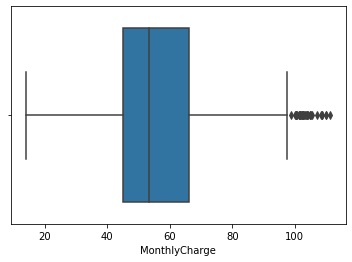

In [12]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'MonthlyCharge')
plt.show() 

Plot di atas menunjukkan titik antara 98 sampai 110, ini adalah outlier karena tidak termasuk dalam kotak pengamatan lain yaitu tidak ada tempat di dekat kuartil.

In [13]:
#### Z score
from scipy import stats
import numpy as np

In [ ]:
df[(np.abs(stats.zscore(df["DataUsage"])) >=3)]

In [ ]:
df[(np.abs(stats.zscore(df["DayMins"])) >=3)]

In [ ]:
df[(np.abs(stats.zscore(df["OverageFee"])) >=3)]

In [14]:
df[(np.abs(stats.zscore(df["MonthlyCharge"])) >=3)]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
115,1,36,0,1,5.40,0,196.8,89,110.0,12.75,20.0
575,0,114,1,1,3.83,1,309.9,90,108.3,10.02,14.2
579,0,72,1,1,4.46,1,186.7,108,105.6,16.75,16.5
670,0,32,1,1,4.40,1,266.7,109,110.0,11.62,16.3
1355,0,50,1,1,3.67,3,302.7,93,108.7,12.03,13.6
1821,0,123,1,1,4.16,1,270.4,99,108.6,12.26,15.4
2122,0,69,1,1,4.43,0,268.8,78,111.3,12.33,16.4
2793,0,107,1,1,3.89,2,283.4,104,106.9,11.21,14.4


In [15]:
df = pd.read_csv('telecom_churn.csv')
df.sample(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3144,1,35,1,0,0.00,5,138.1,115,37.0,7.91,10.3
2542,1,19,1,0,0.00,1,259.4,116,68.0,13.49,9.5
2143,0,79,1,0,0.31,3,156.9,109,41.1,6.11,11.3
307,1,122,1,0,0.00,4,296.4,99,69.0,10.74,11.4
3075,0,181,1,1,1.70,2,105.2,61,64.0,17.07,6.3


In [16]:
print("Highest allowed",df['MonthlyCharge'].mean() + 3*df['MonthlyCharge'].std())
print("Lowest allowed",df['MonthlyCharge'].mean() - 3*df['MonthlyCharge'].std())

Highest allowed 105.58325559497578
Lowest allowed 7.027065437127568


In [17]:
upper_limit = df['MonthlyCharge'].mean() + 3*df['MonthlyCharge'].std()
lower_limit = df['MonthlyCharge'].mean() - 3*df['MonthlyCharge'].std()

In [18]:
df['MonthlyCharge'] = np.where(
    df['MonthlyCharge']>upper_limit,
    upper_limit,
    np.where(
        df['MonthlyCharge']<lower_limit,
        lower_limit,
        df['MonthlyCharge']
    )
)

In [19]:
df['MonthlyCharge'].describe()

count    3333.000000
mean       56.297740
std        16.402834
min        14.000000
25%        45.000000
50%        53.500000
75%        66.200000
max       105.583256
Name: MonthlyCharge, dtype: float64

### IQR

In [20]:
# calculate Q1 and Q3
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_outliers

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
...,...,...,...,...,...,...,...,...,...,...,...
3320,1,122,0,0,0.30,4,140.0,101,44.0,9.82,9.7
3322,1,62,1,0,0.00,4,321.1,105,78.0,13.28,11.5
3323,1,117,1,0,0.39,5,118.4,126,45.9,12.47,13.6
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [21]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
###Plot the distribution plot 

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharge', ylabel='Density'>

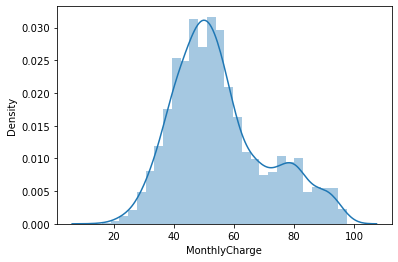

In [22]:
sns.distplot(df['MonthlyCharge'])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharge'>

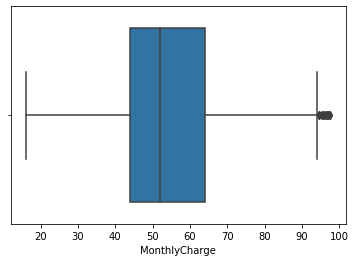

In [23]:
sns.boxplot(df['MonthlyCharge'])

In [ ]:
###Finding upper and lower limit

In [24]:
upper_limit = df['MonthlyCharge'].quantile(0.99)
lower_limit = df['MonthlyCharge'].quantile(0.01)

In [25]:
new_df = df[(df['MonthlyCharge'] <= 74.78) & (df['MonthlyCharge'] >= 58.13)]

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharge'>

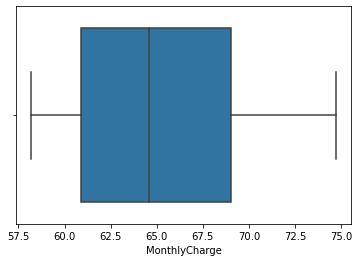

In [26]:
#sns.distplot(new_df['MonthlyCharge'])
sns.boxplot(new_df['MonthlyCharge'])

In [26]:
df['MonthlyCharge'].describe()

count    2427.000000
mean       55.205686
std        15.726587
min        16.000000
25%        44.000000
50%        52.000000
75%        64.000000
max        97.600000
Name: MonthlyCharge, dtype: float64

### Correlation Analysis

In [27]:
### Korelasi Pearson Churn dan MonthlyCharge

df['DataUsage'].corr(df['MonthlyCharge'], 'pearson')

0.8274007375329846

In [28]:
df['DataUsage'].corr(df['MonthlyCharge'], 'spearman')

0.6908321996718823

In [29]:
df.corr('spearman')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountWeeks,NaN,1.000000,NaN,0.012044,0.021853,-0.026436,0.015340,0.042300,0.011079,-0.009023,0.023379
ContractRenewal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DataPlan,NaN,0.012044,NaN,1.000000,0.847831,-0.028949,0.046930,-0.014308,0.740556,0.028032,-0.026003
DataUsage,NaN,0.021853,NaN,0.847831,1.000000,-0.017439,0.033765,-0.026993,0.690832,0.013768,0.055061
CustServCalls,NaN,-0.026436,NaN,-0.028949,-0.017439,1.000000,-0.001856,-0.030701,-0.018729,-0.032542,-0.017213
DayMins,NaN,0.015340,NaN,0.046930,0.033765,-0.001856,1.000000,-0.002789,0.571130,-0.085302,-0.044101
DayCalls,NaN,0.042300,NaN,-0.014308,-0.026993,-0.030701,-0.002789,1.000000,-0.019754,-0.017003,0.010628
MonthlyCharge,NaN,0.011079,NaN,0.740556,0.690832,-0.018729,0.571130,-0.019754,1.000000,0.243625,0.016226
OverageFee,NaN,-0.009023,NaN,0.028032,0.013768,-0.032542,-0.085302,-0.017003,0.243625,1.000000,-0.025093


Dapat dilihat bahwa dua variabel yang memiliki korelasi tinggi adalah MonthlyCharge dan DataUsage. Hal ini make sense karena, semakin lama customer berlangganan, maka semakin tinggi pula total nominal yang mereka telah bayarkan.

### Visualization

In [30]:
def vis_univar(data, column):
    sns.color_palette("pastel")
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':(.2, .8)})
    
    sns.boxplot(data = df, x = column, ax = ax_box, y = 'Churn')
    sns.histplot(data = df, x = column, ax = ax_hist, hue = 'Churn')
    
    ax_box.set(xlabel = '')
    ax_hist.set(ylabel = 'Histogram (Count)')
    
    plt.show()

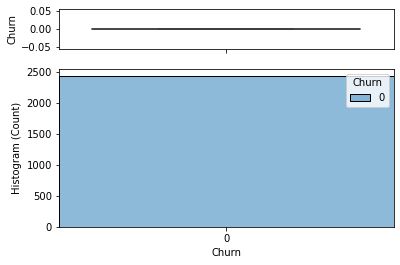

In [31]:
vis_univar(df, 'Churn')

## CLASSIFICATION

In [ ]:
Imbalance
### Check the proportion of 0 and 1 in Churn label

In [32]:
df["Churn"].value_counts()

0    2427
Name: Churn, dtype: int64

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

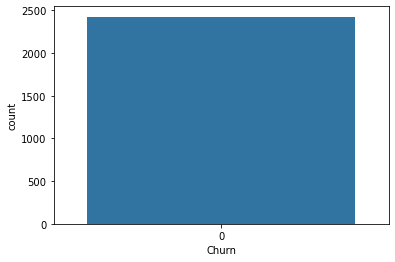

In [33]:
sns.countplot(df["Churn"])

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [35]:
# Separate majority and minority classes
df_majority = df[df.Churn==1]
df_minority = df[df.Churn==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1035,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Churn.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

0    1035
Name: Churn, dtype: int64

In [36]:
df_upsampled["Churn"].value_counts()

0    1035
Name: Churn, dtype: int64

In [37]:
df = df[["Churn", "ContractRenewal", "DataPlan", "DataUsage", "DayMins", "MonthlyCharge", "OverageFee"]]

In [38]:
df.loc[df["Churn"] == "No", "Churn"] = 0
df.loc[df["Churn"] == "Yes", "Churn"] = 1

In [39]:
df.head()

,Churn,ContractRenewal,DataPlan,DataUsage,DayMins,MonthlyCharge,OverageFee
0,0,1,1,2.70,265.1,89.0,9.87
1,0,1,1,3.70,161.6,82.0,9.78
2,0,1,0,0.00,243.4,52.0,6.06
11,0,1,0,0.34,187.7,49.4,8.17
12,0,1,0,0.00,128.8,31.0,5.25


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2427 entries, 0 to 3330
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            2427 non-null   int64  
 1   ContractRenewal  2427 non-null   int64  
 2   DataPlan         2427 non-null   int64  
 3   DataUsage        2427 non-null   float64
 4   DayMins          2427 non-null   float64
 5   MonthlyCharge    2427 non-null   float64
 6   OverageFee       2427 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 216.2 KB


In [ ]:
###one hot encoding

In [41]:
df = pd.get_dummies(df)
df.head()

,Churn,ContractRenewal,DataPlan,DataUsage,DayMins,MonthlyCharge,OverageFee
0,0,1,1,2.70,265.1,89.0,9.87
1,0,1,1,3.70,161.6,82.0,9.78
2,0,1,0,0.00,243.4,52.0,6.06
11,0,1,0,0.34,187.7,49.4,8.17
12,0,1,0,0.00,128.8,31.0,5.25


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2427 entries, 0 to 3330
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            2427 non-null   int64  
 1   ContractRenewal  2427 non-null   int64  
 2   DataPlan         2427 non-null   int64  
 3   DataUsage        2427 non-null   float64
 4   DayMins          2427 non-null   float64
 5   MonthlyCharge    2427 non-null   float64
 6   OverageFee       2427 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 216.2 KB


In [ ]:
### Logistic Regression

In [43]:
# defining feature matrix(X) and response vector(y)
X = df.loc[:, df.columns != 'Churn']
y = df["Churn"]

In [44]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [ ]:
### Logistic Regression

In [45]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# memprediksi model dengan test set
pred = model.predict(X_test)

# mengevaluasi model dengan MAE
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.0


In [ ]:
### Decision Tree

In [55]:
from sklearn import tree
#import pydotplus
#import matplotlib.pyplot as plt
#import matplotlib.image as pltimg

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [56]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- class: 0



In [ ]:
### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
### Hyperparameter Tuning

In [58]:
rf = RandomForestClassifier(random_state=142, n_jobs=-1)

In [59]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [60]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=142),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [61]:
grid_search.best_score_

1.0

In [62]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=142)

In [ ]:
### Evaluation

In [64]:
y_dtree = dtree.predict(X_test)
y_rf = rf_best.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_dtree))
print(accuracy_score(y_test, y_rf))

1.0
1.0


In [66]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_dtree, average='macro'))
print(precision_score(y_test, y_rf, average='macro'))

1.0
1.0


In [67]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_dtree, average='macro'))
print(recall_score(y_test, y_rf, average='macro'))

1.0
1.0


In [68]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_dtree))
print(confusion_matrix(y_test, y_rf))

[[971]]
[[971]]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_dtree))
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       971

    accuracy                           1.00       971
   macro avg       1.00      1.00      1.00       971
weighted avg       1.00      1.00      1.00       971

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       971

    accuracy                           1.00       971
   macro avg       1.00      1.00      1.00       971
weighted avg       1.00      1.00      1.00       971

